In [1]:
import numpy as np
import scipy as sc
import pandas as pd
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import xarray as xr
import glob
from tqdm.notebook import tqdm
import cartopy.feature as cf
import matplotlib
from shapely.geometry.polygon import LinearRing

In [2]:
var_in="mjo"
lo1=0.0
lo2=360.0
la1=-30.0
la2=30

in_O=xr.open_dataset('/fs3/home/bgoswami/work/20220908_Andrea/CCEW/obs/olr.'+str(var_in)+'.nc',decode_times=False);
in_C=xr.open_dataset('/fs3/home/bgoswami/work/20220908_Andrea/CCEW/CTRL/CTRL.olr.'+str(var_in)+'.nc',decode_times=False);
in_E02=xr.open_dataset('/fs3/home/bgoswami/work/20220908_Andrea/CCEW/expt_andrea02/expt_andrea02.olr.'+str(var_in)+'.nc',decode_times=False);
in_E03=xr.open_dataset('/fs3/home/bgoswami/work/20220908_Andrea/CCEW/expt_andrea03/expt_andrea03.olr.'+str(var_in)+'.nc',decode_times=False);
in_E04=xr.open_dataset('/fs3/home/bgoswami/work/20220908_Andrea/CCEW/expt_andrea/expt_andrea.olr.'+str(var_in)+'.nc',decode_times=False);
in_Eslow=xr.open_dataset('/fs3/home/bgoswami/work/20220908_Andrea/CCEW/expt_andrea_4h/expt_andrea_4h.olr.'+str(var_in)+'.nc',decode_times=False);

var_in_O=in_O.sel(lon=slice(int(lo1),int(lo2)),lat=slice(int(la1),int(la2))).var(dim='time')
var_in_C=in_C.sel(lon=slice(int(lo1),int(lo2)),lat=slice(int(la1),int(la2))).var(dim='time')

var_in_E02  =in_E02.sel  (lon=slice(int(lo1),int(lo2)),lat=slice(int(la1),int(la2))).var(dim='time')
var_in_E03  =in_E03.sel  (lon=slice(int(lo1),int(lo2)),lat=slice(int(la1),int(la2))).var(dim='time')
var_in_E04  =in_E04.sel  (lon=slice(int(lo1),int(lo2)),lat=slice(int(la1),int(la2))).var(dim='time')
var_in_Eslow=in_Eslow.sel(lon=slice(int(lo1),int(lo2)),lat=slice(int(la1),int(la2))).var(dim='time')

In [3]:

varO=var_in_O
varC=var_in_C
varE02=var_in_E02
varE03=var_in_E03
varE04=var_in_E04
varEslow=var_in_Eslow

lowbound=0
highbound=200
intervel_num=10

norm=False
if norm:
    #This is to normalize the variance by domain mean
    varnam=[varO,varC,varE02,varE03,varE04,varEslow]
    for i in range(len(varnam)):
        varnam[i]=varnam[i]/varnam[i].mean()
        
    varO=varO/varO.mean()
    varC=varC/varC.mean()
    varE02=varE02/varE02.mean()
    varE03=varE03/varE03.mean()
    varE04=varE04/varE04.mean()
    varEslow=varEslow/varEslow.mean()
    
    lowbound=0
    highbound=3
    intervel_num=10

In [4]:
cm='YlGnBu'

In [5]:
def plot_var(var, ax, proj=ccrs.PlateCarree()):
    """Plot of raw variance"""
    
    lon2D, lat2D = np.meshgrid(var.variables['lon'][:], var.variables['lat'][:])
    
    norm=False
    
    lowbound=0
    highbound=200
    intervel_num=10
    
    if norm:
        lowbound=0
        highbound=3
        intervel_num=10
    
    vint=(highbound-lowbound)/intervel_num
    clevs = np.linspace(lowbound,highbound,intervel_num-1)
    
    maplw=0.2
    
#    fig = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
    ax.contourf(lon2D-180, lat2D, var[''+str(var_in)+''],clevs, extend='both', cmap=cm,projection=proj)
#    ax = plt.subplot(projection=ccrs.PlateCarree(180))
    ax.set_extent([var.variables['lon'][0], var.variables['lon'][-1], var.variables['lat'][0], var.variables['lat'][-1]], ccrs.PlateCarree())
    ax.set_aspect('equal', adjustable=None)
    ax.coastlines(linewidth=maplw, color='k',alpha=0.4)
    ax.add_feature(cf.BORDERS, linewidth=maplw,alpha=0.4)
    gl=ax.gridlines(draw_labels=True, linewidth=0.1, color='gray',alpha=0.1)
    gl.top_labels = gl.right_labels = False
    gl.ylabel_style = gl.xlabel_style = {'size': 14, 'color': 'k', 'weight': 'light'}

In [13]:
def plot_var_norm(var, ax, proj=ccrs.PlateCarree()):
    """Plot of raw variance"""
    
    lon2D, lat2D = np.meshgrid(var.variables['lon'][:], var.variables['lat'][:])
    
    norm=True
    
    lowbound=0
    highbound=200
    intervel_num=10
    
    if norm:
        lowbound=0
        highbound=3
        intervel_num=10
    
    vint=(highbound-lowbound)/intervel_num
    clevs = np.linspace(lowbound,highbound,intervel_num-1)
    
    maplw=0.3
    
#    fig = plt.subplots(subplot_kw={"projection": ccrs.PlateCarree()})
    ax.contourf(lon2D-180, lat2D, var[''+str(var_in)+''],clevs, extend='both', cmap=cm,projection=proj)
#    ax = plt.subplot(projection=ccrs.PlateCarree(180))
    ax.set_extent([var.variables['lon'][0], var.variables['lon'][-1], var.variables['lat'][0], var.variables['lat'][-1]], ccrs.PlateCarree())
    ax.set_aspect('equal', adjustable=None)
    ax.coastlines(linewidth=maplw, color='k',alpha=0.4)
    ax.add_feature(cf.BORDERS, linewidth=maplw,alpha=0.4)
    gl=ax.gridlines(draw_labels=True, linewidth=0.1, color='gray',alpha=0.1)
    gl.top_labels = gl.right_labels = False
    gl.ylabel_style = gl.xlabel_style = {'size': 14, 'color': 'k', 'weight': 'light'}

In [6]:
varO

<xarray.Dataset>
Dimensions:  (lat: 25, lon: 144)
Coordinates:
  * lat      (lat) float32 -30.0 -27.5 -25.0 -22.5 -20.0 ... 22.5 25.0 27.5 30.0
  * lon      (lon) float32 0.0 2.5 5.0 7.5 10.0 ... 350.0 352.5 355.0 357.5
Data variables:
    mjo      (lat, lon) float32 28.93 28.08 27.3 26.59 ... 26.11 26.24 26.44

/nfs/scistore16/mullegrp/bgoswami/anaconda3/lib/python3.9/site-packages/cartopy/mpl/geoaxes.py:1508: UserWarning: The following kwargs were not used by contour: 'projection'
  result = matplotlib.axes.Axes.contourf(self, *args, **kwargs)


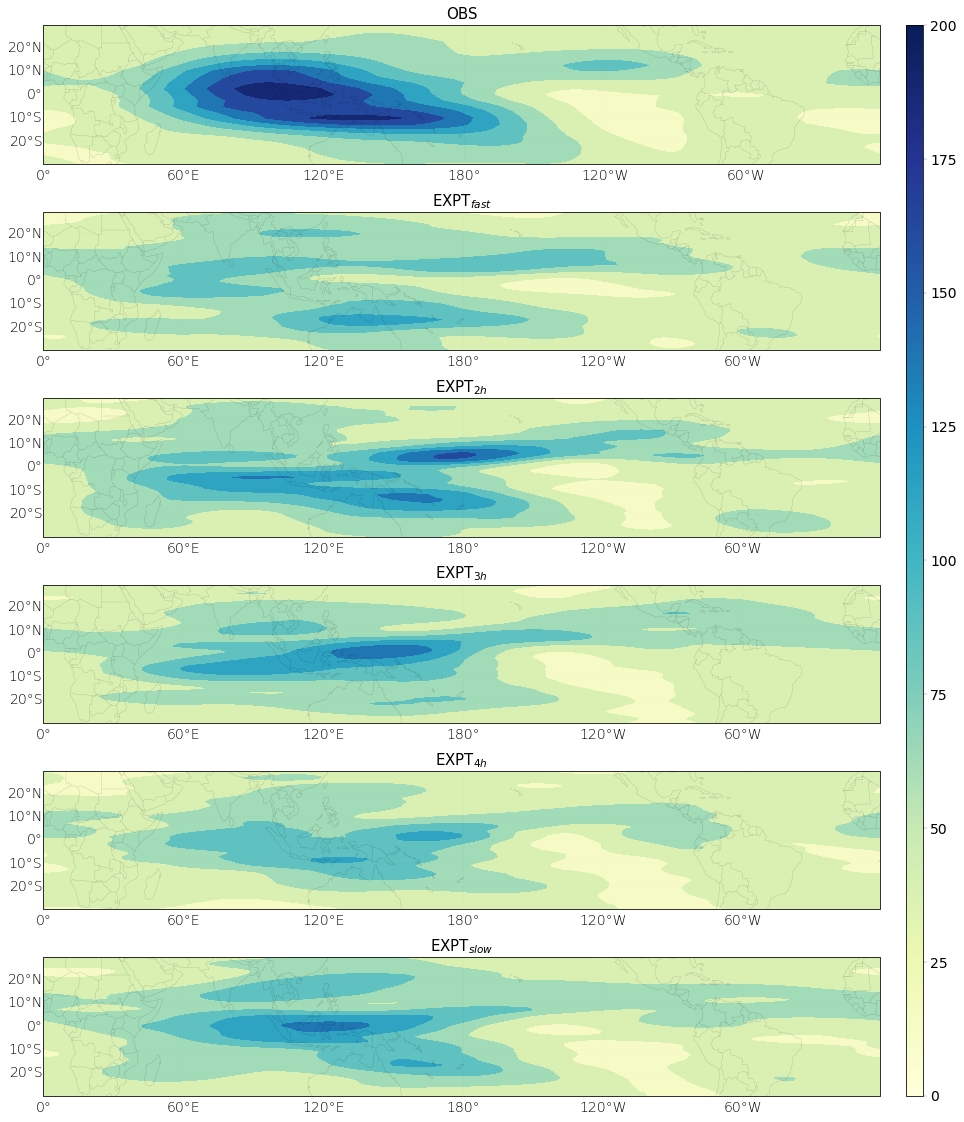

In [7]:
fig, ax = plt.subplots(6, 1, sharey=True, figsize=(15,20), subplot_kw={"projection": ccrs.PlateCarree(180)}, gridspec_kw = {'wspace':0.08, 'hspace':0.2})
fnt=15

plot_var(varO, ax[0], ccrs.PlateCarree())
ax[0].set_title("OBS", fontsize=fnt)

plot_var(varC, ax[1], ccrs.PlateCarree())
ax[1].set_title("EXPT$_{fast}$", fontsize=fnt)

plot_var(varE02, ax[2], ccrs.PlateCarree())
ax[2].set_title("EXPT$_{2h}$", fontsize=fnt)

plot_var(varE03, ax[3], ccrs.PlateCarree())
ax[3].set_title("EXPT$_{3h}$", fontsize=fnt)

plot_var(varE04, ax[4], ccrs.PlateCarree())
ax[4].set_title("EXPT$_{4h}$", fontsize=fnt)

plot_var(varEslow, ax[5], ccrs.PlateCarree())
ax[5].set_title("EXPT$_{slow}$", fontsize=fnt)



#######################################
#For plotting shared colorbar
postop= ax[0].get_position()
posbot= ax[5].get_position()

norm = matplotlib.colors.Normalize(vmin=lowbound, vmax=highbound,clip=True)
sm = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([postop.y1+0.05, posbot.y0, posbot.width/50, postop.y1-posbot.y0])
cbar_ax.tick_params(labelsize=14, width=0.2)
plt.colorbar(sm, cax=cbar_ax)
########################################

#Saving figure
figname="Figure_06"

plt.savefig('/fs3/home/bgoswami/work/20220908_Andrea/FIGURES_v1.0/'+str(figname)+'.svg', format="svg",transparent=True, dpi=1200)
!rsvg-convert -f pdf -o /fs3/home/bgoswami/work/20220908_Andrea/FIGURES_v1.0/{figname}.pdf /fs3/home/bgoswami/work/20220908_Andrea/FIGURES_v1.0/{figname}.svg
plt.show()

In [8]:
varnam=[varO,varC,varE02,varE03,varE04,varEslow]
for i in range(len(varnam)):
    varnam[i]=varnam[i]/varnam[i].mean()

varO=varO/varO.mean()
varC=varC/varC.mean()
varE02=varE02/varE02.mean()
varE03=varE03/varE03.mean()
varE04=varE04/varE04.mean()
varEslow=varEslow/varEslow.mean()


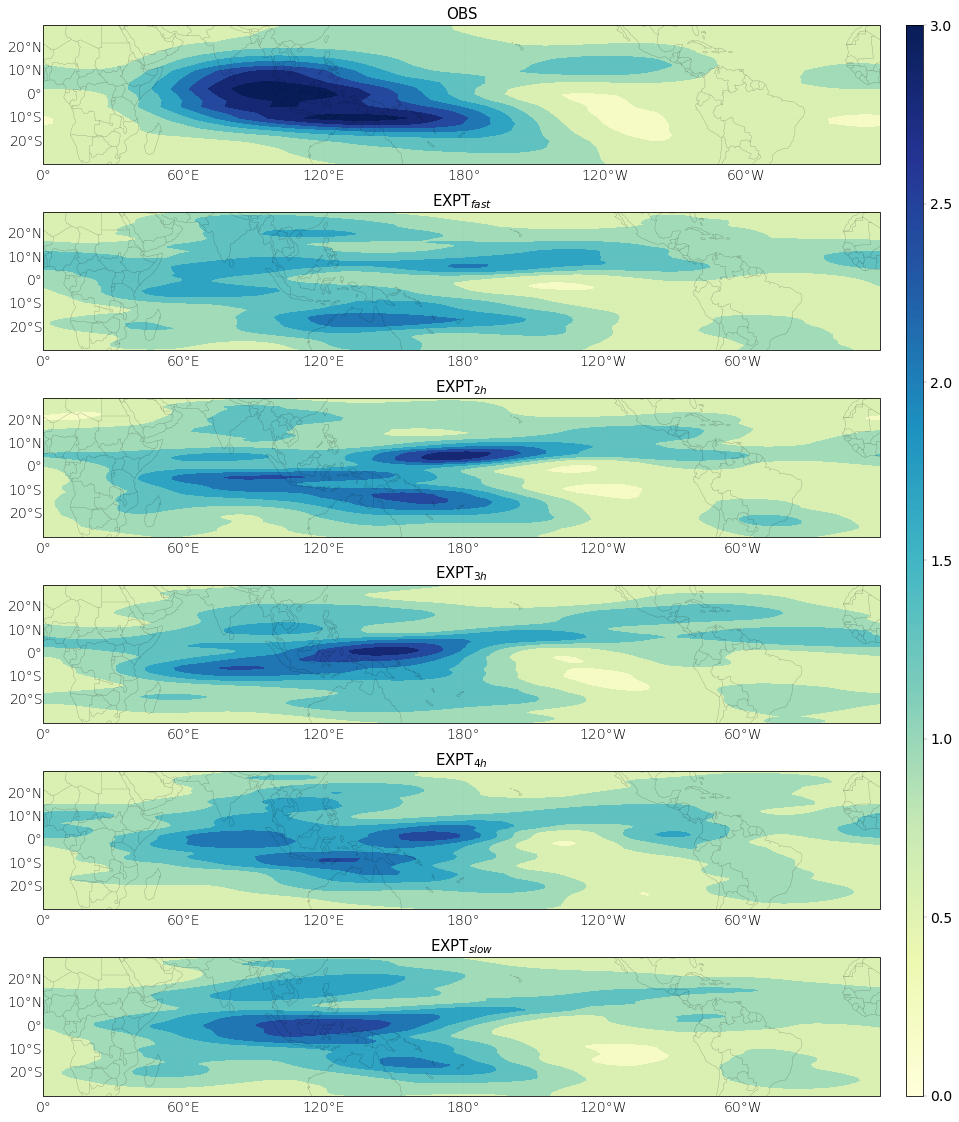

In [15]:
lowbound=0
highbound=3
intervel_num=10

fig, ax = plt.subplots(6, 1, sharey=True, figsize=(15,20), subplot_kw={"projection": ccrs.PlateCarree(180)}, gridspec_kw = {'wspace':0.08, 'hspace':0.2})
fnt=15

plot_var_norm(varO, ax[0], ccrs.PlateCarree())
ax[0].set_title("OBS", fontsize=fnt)

plot_var_norm(varC, ax[1], ccrs.PlateCarree())
ax[1].set_title("EXPT$_{fast}$", fontsize=fnt)

plot_var_norm(varE02, ax[2], ccrs.PlateCarree())
ax[2].set_title("EXPT$_{2h}$", fontsize=fnt)

plot_var_norm(varE03, ax[3], ccrs.PlateCarree())
ax[3].set_title("EXPT$_{3h}$", fontsize=fnt)

plot_var_norm(varE04, ax[4], ccrs.PlateCarree())
ax[4].set_title("EXPT$_{4h}$", fontsize=fnt)

plot_var_norm(varEslow, ax[5], ccrs.PlateCarree())
ax[5].set_title("EXPT$_{slow}$", fontsize=fnt)



#######################################
#For plotting shared colorbar
postop= ax[0].get_position()
posbot= ax[5].get_position()

norm = matplotlib.colors.Normalize(vmin=lowbound, vmax=highbound,clip=True)
sm = matplotlib.cm.ScalarMappable(cmap=cm, norm=norm)
sm.set_array([])
cbar_ax = fig.add_axes([postop.y1+0.05, posbot.y0, posbot.width/50, postop.y1-posbot.y0])
cbar_ax.tick_params(labelsize=14, width=0.2)
plt.colorbar(sm, cax=cbar_ax)
########################################

#Saving figure
figname="Figure_S4"

plt.savefig('/fs3/home/bgoswami/work/20220908_Andrea/FIGURES_v1.0/'+str(figname)+'.svg', format="svg",transparent=True, dpi=1200)
!rsvg-convert -f pdf -o /fs3/home/bgoswami/work/20220908_Andrea/FIGURES_v1.0/{figname}.pdf /fs3/home/bgoswami/work/20220908_Andrea/FIGURES_v1.0/{figname}.svg
plt.show()